In [1]:
import numpy as np
import pandas as pd
import torch

import torchdrift.detectors as detectors

Norms for the untargeted bb attack

In [2]:
df_clean = pd.read_csv("Optimal myBB uninit obs.csv",header=None, dtype='float32')
df_adv = pd.read_csv("Optimal myBB uninit adv obs.csv", header=None, dtype='float32')
adv_norms = (df_adv - df_clean).apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

<Axes: title={'center': 'KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks'}, ylabel='Density'>

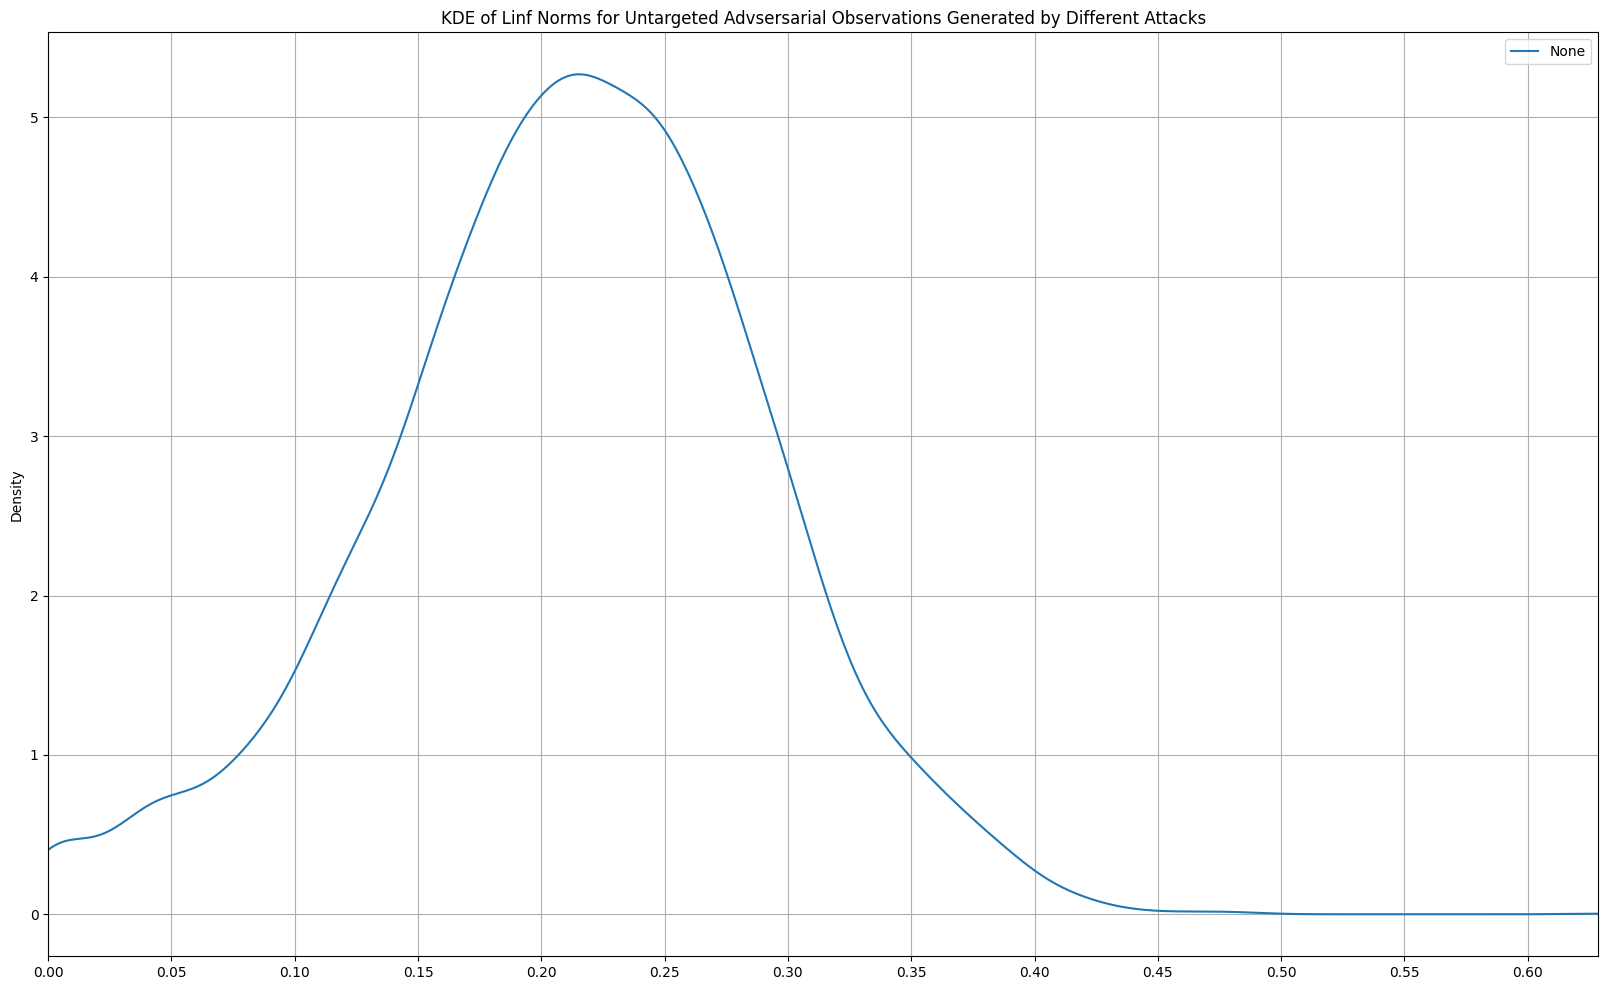

In [3]:
adv_norms.plot.kde(grid=True, 
                   xticks=np.arange(start=adv_norms.min(), stop=adv_norms.max(), step=0.05),
                   figsize=(20,12),
                   xlim=[adv_norms.min(),adv_norms.max()], #NB the max/min of a df is a series, and we need the max/min of the series
                   title='KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks',
                   xlabel='Linf Norms',
                   legend=True
                   )

KDE is centered around ~0.23 (as was the PPO 300), wheras it was ~0.29 for the PPO 500

TODO: overlay both distributions for presentation

In [4]:
BOOTSTRAP = 10_000
PVAL = 0.05
kernel = detectors.mmd.GaussianKernel()

In [5]:
result = detectors.kernel_mmd(torch.from_numpy(df_clean.values).to('cuda'),
                                  torch.from_numpy(df_adv.values).to('cuda'),
                                  n_perm=BOOTSTRAP,
                                  kernel=kernel)
print(f'mmd:{result[0]}, p-value:{result[1]}')

mmd:0.03796577453613281, p-value:0.0


MMD is still too large, slightly larger than with the PPO trained for 300 episodes, though it's ASR was lower